### Amazon Review Data Processing

Source Dataset: https://nijianmo.github.io/amazon/index.html#subsets

Download from _"Small" subsets for experimentation_ with the titles:

*   _Electronics	5-core (6,739,590 reviews)_

The file is saved in the Google drive data directory, but not tracked in this Github repository due to filesize limitations. The downloaded file name is `Electronics_5.json.gz`.

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz -P ./data

--2022-07-25 04:47:34--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1251876861 (1.2G) [application/octet-stream]
Saving to: ‘./data/Electronics_5.json.gz’

Electronics_5.json. 100%[===================>]   1.17G  40.9MB/s    in 30s     

2022-07-25 04:48:04 (40.0 MB/s) - ‘./data/Electronics_5.json.gz’ saved [1251876861/1251876861]



In [ ]:
import os
import gzip
import json
import numpy as np

import shutil
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [ ]:
# Filepaths of raw zip download
zip_fp = os.path.join(os.getcwd(), "data", "Electronics_5.json.gz")

# Unzipped JSON:
out_fp = os.path.join(os.getcwd(), "data", "Electronics_5.json")

In [ ]:
with gzip.open(zip_fp, "rb") as f_in:
    with open(out_fp, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
### load the "Small" subsets of data

data = []
with open(out_fp,"r") as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

In [ ]:
df1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3410014,4.0,True,"01 1, 2017",A2MFARH7H7FSY1,B01HJ1INB0,{'Format:': ' DVD'},Ali A. Diba,The singing parts are very good as expected fr...,Verdi's Otello,1483228800,4,NaN
3410015,5.0,True,"12 6, 2016",AY532XZ00UTKN,B01HJ1INB0,{'Format:': ' Blu-ray'},Amazon Customer,This recording of the 2015 production by the M...,Verdi's Take on Shakespear's Othello,1480982400,8,NaN
3410016,4.0,False,"12 6, 2016",A2VWQXWF1GO2ZE,B01HJ1INB0,{'Format:': ' Blu-ray'},Noam Eitan,I do not wish to write a review about this rel...,"Voices on all MET video releases, broadcasts a...",1480982400,11,NaN
3410017,5.0,False,"11 6, 2016",A22AB77OD50U4M,B01HJ1INB0,{'Format:': ' Blu-ray'},Amazon Customer,It was a gift.,Five Stars,1478390400,NaN,NaN


In [ ]:
df1.iloc[0]

overall                                                         5.0
verified                                                       True
reviewTime                                               11 9, 2012
reviewerID                                           A2M1CU2IRZG0K9
asin                                                     0005089549
style                                      {'Format:': ' VHS Tape'}
reviewerName                                                  Terri
reviewText        So sorry I didn't purchase this years ago when...
summary                                                    Amazing!
unixReviewTime                                           1352419200
vote                                                            NaN
image                                                           NaN
Name: 0, dtype: object

Next, we want to explore the distribution of "Overall" ratings by calculating the average rating in this small category. For _Movies and TV_ subset, the average rating is 4.22 stars. We also plot a histogram and count on each value (1.0 - 5.0) to look at the distribution.

In [ ]:
#Read the data
def parse(path):
  g = open(path, 'r')
  for l in g:
    yield json.loads(l)

ratings = []

for review in parse(out_fp):
  ratings.append(review['overall'])

print(sum(ratings) / len(ratings))

4.221320174462371


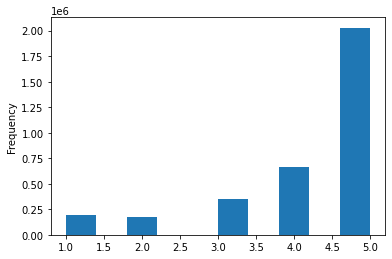

In [ ]:
df1["overall"].plot.hist(bins=10)

In [ ]:
df1["overall"].value_counts()

5.0    2028791
4.0     665920
3.0     349700
1.0     193169
2.0     172439
Name: overall, dtype: int64

We decide to randomly select 100% of raw data as a sample data for training, test, and validation. We also set a random seed to select data that are reproducible.

In order to avoid out-of-memory issue, we break down the files into parts for every 50,000 records. Each part only contains 50,000 or less records.

Next, we remove reviews with 3 - 4 ratings and categorize 1-2 as negative (bad) reviews and 5 as positive (good) reviews.

In [ ]:
with open(out_fp, "r") as f:
    
    # Initialize:
    sample_data = list()
    selected, saved = 0, False
    part = 1
    eligible = 0
    
    # Random seeds generator:
    random.seed(16)
    rand_gen = (random.randint(1, 100) for _ in range(1000000000))
    
    # Iterate through all reviews:
    for i, line in enumerate(f):

        # If the reviews contains 3 or 4 ratings, we consider
        # them to be neutral and discard them, only keep 1/2 and 5:
        true, false=True, False
        data = eval(line)
        rating = data["overall"]
        discard = rating >= 3 and rating <= 4
        if discard:
            continue
        eligible += 1

        # Randomly select 100% of records (% can be adjusted):
        if next(rand_gen) <= 100:  
            selected += 1
            sample_data.append(data)
            saved = False
        else:
            continue        

        # Save the part files at the beginning:
        if (not selected % 50_000) and (selected != 0) and (not saved):
            pt = f"{part:.0f}".zfill(4)
            part_name = f"Part{pt}_Electronics_5.json"
            part_fp = os.path.join(os.getcwd(), "data", part_name)
            with open(part_fp, "w") as part_f:
                json.dump(sample_data, part_f)
            part += 1
            sample_data = list()
            saved = True

# Save the last part file at the end:
if len(sample_data):
    pt = f"{part:.0f}".zfill(4)
    part_name = f"Part{pt}_Electronics_5.json"
    part_fp = os.path.join(os.getcwd(), "data", part_name)
    with open(part_fp, "w") as part_f:
        json.dump(sample_data, part_f)

Finally we combine the parts and load the parts json files into one single pandas DataFrame.

In [ ]:
df = pd.DataFrame()

files = [f for f in os.listdir(os.path.join(os.getcwd(), "data")) if "Part" in f]
print(files)
for part_name in files:
    part_fp = os.path.join(os.getcwd(), "data", part_name)
    print(part_fp)
    with open(part_fp, "r") as part_file:
        part_data = json.load(part_file)
        part_df = pd.DataFrame(part_data)
        df = df.append(part_df).reset_index(drop=True)

['Part0068_Electronics_5.json', 'Part0019_Electronics_5.json', 'Part0027_Electronics_5.json', 'Part0014_Electronics_5.json', 'Part0005_Electronics_5.json', 'Part0049_Electronics_5.json', 'Part0100_Electronics_5.json', 'Part0054_Electronics_5.json', 'Part0008_Electronics_5.json', 'Part0087_Electronics_5.json', 'Part0085_Electronics_5.json', 'Part0004_Electronics_5.json', 'Part0091_Electronics_5.json', 'Part0095_Electronics_5.json', 'Part0081_Electronics_5.json', 'Part0099_Electronics_5.json', 'Part0075_Electronics_5.json', 'Part0036_Electronics_5.json', 'Part0011_Electronics_5.json', 'Part0096_Electronics_5.json', 'Part0007_Electronics_5.json', 'Part0102_Electronics_5.json', 'Part0069_Electronics_5.json', 'Part0032_Electronics_5.json', 'Part0016_Electronics_5.json', 'Part0070_Electronics_5.json', 'Part0079_Electronics_5.json', 'Part0033_Electronics_5.json', 'Part0082_Electronics_5.json', 'Part0060_Electronics_5.json', 'Part0009_Electronics_5.json', 'Part0097_Electronics_5.json', 'Part00

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 21, 2016",AU9ZOZC6Q0ILR,B00LPIR96Y,{'Color:': ' Black'},DaGreat1,Tried many digitizers (As least 11). Some fel...,Awesome Replacement,1474416000,NaN,NaN
1,5.0,True,"09 14, 2016",A251DL6C9YT848,B00LPIR96Y,{'Color:': ' White'},Jkeys0121,It made reassembly very easy,Five Stars,1473811200,NaN,NaN
2,5.0,True,"09 2, 2016",A46TT8M6QH0HU,B00LPIR96Y,{'Color:': ' Black'},Curtis W Carver,great product,Five Stars,1472774400,NaN,NaN
3,5.0,True,"09 2, 2016",A3VLZ3HQVLJN9V,B00LPIR96Y,{'Color:': ' Black'},ChrisWNY,Perfect replacement...fixed an iPad 3 with a s...,"Reasonable price, reliable replacement for ori...",1472774400,NaN,NaN
4,5.0,True,"08 19, 2016",A4DOFWJTIA21G,B00LPIR96Y,{'Color:': ' White'},J E ROSENTHAL,Great,Five Stars,1471564800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5097411,5.0,True,"03 7, 2014",AYC2SOIZY1CUL,B001342KM8,{'Capacity:': ' 2GB'},F. Chin,My Acer Aspire One running Windows Home was ru...,Works on Acer Aspire One KAV60,1394150400,NaN,NaN
5097412,5.0,True,"03 1, 2014",A1SH5P737MYDUR,B001342KM8,{'Capacity:': ' 2GB'},zoltar_speaks,with thoughts of upgrading the OS to either Wi...,Purchased for an old Compaq netbook....,1393632000,NaN,NaN
5097413,5.0,True,"02 21, 2014",A64LEAZ2QF8L2,B001342KM8,{'Capacity:': ' 2GB'},James P.,This memory was bought for a new netbook and a...,Crucial makes good memory,1392940800,NaN,NaN
5097414,5.0,True,"02 20, 2014",A1STT23Y1NESY1,B001342KM8,{'Capacity:': ' 2GB'},Dirk,Pros - Crucial memory products are of high qua...,Great Price - Great Product,1392854400,NaN,NaN


In [ ]:
# Inspect "Overall" ratings after data pre-processing
# Notice that rating 3.0 and 4.0 are removed
df['overall'].value_counts()

5.0    4323582
1.0     467158
2.0     306676
Name: overall, dtype: int64

In [ ]:
# Create a new label in the dataframe
POSITIVE=1
NEGATIVE=0
df["rating_label"] = np.where(df["overall"] == 5.0, POSITIVE, NEGATIVE)

print(df["rating_label"])

0          1
1          1
2          1
3          1
4          1
          ..
5097411    1
5097412    1
5097413    1
5097414    1
5097415    1
Name: rating_label, Length: 5097416, dtype: int64


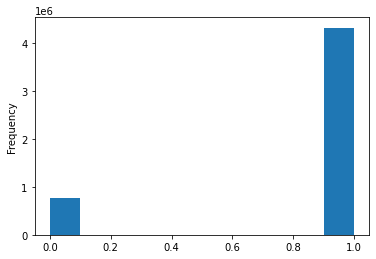

In [ ]:
# Plot a histogram to show the distribution of positive/negative rating label
df["rating_label"].plot.hist(bins=10)

Based on the histogram distribution of the ratings label, we notice a class imbalance issue in this dataset. Therefore, we will need to undersample some of the positive labels to alleviate the class imbalance impact.

In [ ]:
# Count the number of postive labels:
positive_label = len(df[(df["rating_label"] == POSITIVE)])
print(positive_label)

4323582


In [ ]:
# Count the number of negative labels:
negative_label = len(df[(df["rating_label"] == NEGATIVE)])
print(negative_label)

773834


In [ ]:
# Sample the same amount of negative labels from positive labels
positive_df_sampled = df[(df["rating_label"] == POSITIVE)].sample(n=negative_label, random_state=16)

In [ ]:
# Append the sampled positive labels to the existing negative labels
negative_df = df[(df["rating_label"] == NEGATIVE)]

new_balanced_df = negative_df.append(positive_df_sampled)

In [ ]:
# Check the balance of new Dataframe
new_balanced_df["rating_label"].mean()

0.5

In [ ]:
# Reset Index for  the new balanced Dataframe
new_balanced_df = new_balanced_df.reset_index(drop=True)

In [ ]:
new_balanced_df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,rating_label
0,1.0,True,"08 10, 2016",A34LF5RT51YYXS,B00LPIR96Y,{'Color:': ' White'},Nassim T.,Intalled digitizer no response from glass smh ...,One Star,1470787200,NaN,NaN,0
1,2.0,True,"06 13, 2016",A305T4TL3MF8CT,B00LPIR96Y,{'Color:': ' Black'},Matt McCaul,I ordered two of these. The first was perfect....,Hit and miss,1465776000,NaN,NaN,0
2,2.0,True,"06 3, 2016",AYWBFF27XG4QD,B00LPIR96Y,{'Color:': ' White'},rm3sweet,Of all the other brands I've purchased this on...,Fits perfect! Stopped working after a week:(,1464912000,NaN,NaN,0
3,2.0,True,"03 29, 2016",A1TAPADZU3Q6MI,B00LPIR96Y,{'Color:': ' White'},J,I don't know if I did a bad install but the di...,Not sure if it was me or the product.,1459209600,NaN,NaN,0
4,2.0,False,"03 3, 2016",APP5G31NNOHID,B00LPIR96Y,{'Color:': ' Black'},Peter Berglund,This review is for glass/digitizer replacement...,Work but is detect,1456963200,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547663,5.0,True,"06 28, 2015",A1C89MDNKN62QN,B0017YVUHK,NaN,Jack Z,The battery pair was easy to install without s...,"Good price, good battery",1435449600,NaN,NaN,1
1547664,5.0,False,"12 9, 2013",A328S9RN3U5M68,B003XN24GY,{'Color:': ' Breeze Mobile'},Grady Harp,With the current temperatures across the count...,Remembering summer heat...,1386547200,NaN,NaN,1
1547665,5.0,True,"01 4, 2015",A1LJE8X10L3CTE,B00D9UN5Z0,"{'Size:': ' Google Nexus 7', 'Color:': ' Dark ...",Old Guy,I keep my Nexus 7 in this sleeve when I am home.,Five Stars,1420329600,NaN,NaN,1
1547666,5.0,True,"12 8, 2014",AO6KYXHXWTN0A,B0015DYMVO,{'Style:': ' 1 Amp'},Michael Nitz,Worked like a charm!,Five Stars,1417996800,NaN,NaN,1


In [ ]:
# new_balanced_df = new_balanced_df.dropna()

In [ ]:
# Save the new balanced Dataframe into csv
fp = os.path.join(os.getcwd(), "data", "Electronics_new_balanced_df.csv")
new_balanced_df.to_csv(fp, encoding="utf-8", index=False)

In [ ]:
new_balanced_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,rating_label
0,1.0,True,"08 10, 2016",A34LF5RT51YYXS,B00LPIR96Y,{'Color:': ' White'},Nassim T.,Intalled digitizer no response from glass smh ...,One Star,1470787200,NaN,NaN,0
1,2.0,True,"06 13, 2016",A305T4TL3MF8CT,B00LPIR96Y,{'Color:': ' Black'},Matt McCaul,I ordered two of these. The first was perfect....,Hit and miss,1465776000,NaN,NaN,0
2,2.0,True,"06 3, 2016",AYWBFF27XG4QD,B00LPIR96Y,{'Color:': ' White'},rm3sweet,Of all the other brands I've purchased this on...,Fits perfect! Stopped working after a week:(,1464912000,NaN,NaN,0
3,2.0,True,"03 29, 2016",A1TAPADZU3Q6MI,B00LPIR96Y,{'Color:': ' White'},J,I don't know if I did a bad install but the di...,Not sure if it was me or the product.,1459209600,NaN,NaN,0
4,2.0,False,"03 3, 2016",APP5G31NNOHID,B00LPIR96Y,{'Color:': ' Black'},Peter Berglund,This review is for glass/digitizer replacement...,Work but is detect,1456963200,NaN,NaN,0


In [ ]:
new_balanced_df = new_balanced_df[['reviewText','rating_label']]

In [ ]:
new_balanced_df.head()

,reviewText,rating_label
0,Intalled digitizer no response from glass smh ...,0
1,I ordered two of these. The first was perfect....,0
2,Of all the other brands I've purchased this on...,0
3,I don't know if I did a bad install but the di...,0
4,This review is for glass/digitizer replacement...,0


In [ ]:
new_balanced_df['rating_label'].value_counts()

0    773834
1    773834
Name: rating_label, dtype: int64

In [ ]:
new_balanced_df['reviewText'].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1547663    False
1547664    False
1547665    False
1547666     True
1547667    False
Name: reviewText, Length: 1547668, dtype: bool